In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')
structures = pd.read_csv('structures.csv')

In [3]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [5]:
sub.head()

,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0


In [6]:
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [7]:
print(f'There are {train.shape[0]} rows in train data.')
print(f"There are {train['molecule_name'].nunique()} distinct molecules in train data.")
print(f"There are {train['type'].nunique()} unique types.")
print(f'There are {test.shape[0]} rows in test data.')
print(f"There are {test['molecule_name'].nunique()} distinct molecules in test data.")
print(f"There are {test['type'].nunique()} unique types.")
print(f'There are {structures.shape[0]} rows in train data.')
print(f"There are {structures['atom'].nunique()} unique atoms.")


There are 4658147 rows in train data.
There are 85003 distinct molecules in train data.
There are 8 unique types.
There are 2505542 rows in test data.
There are 45772 distinct molecules in test data.
There are 8 unique types.
There are 2358657 rows in train data.
There are 5 unique atoms.


In [8]:
magnetic_shield= pd.read_csv('magnetic_shielding_tensors.csv')
magnetic_shield.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [9]:
dipole_moments= pd.read_csv('dipole_moments.csv')
dipole_moments.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [10]:
potential_energy= pd.read_csv('potential_energy.csv')
potential_energy.head()

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


In [11]:
scalar_coupling= pd.read_csv('scalar_coupling_contributions.csv')
scalar_coupling.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [12]:
mulliken_charges=pd.read_csv('mulliken_charges.csv')
mulliken_charges.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


Joining of table from Kaggle


In [2]:
from IPython.display import display

data_path = '../Molecular_Properties'

In [3]:
!ls -lSh $data_path/*.csv

-rwxr-xr-x@ 1 Iftekher  staff   280M May 29 16:33 ../Molecular_Properties/scalar_coupling_contributions.csv
-rwxr-xr-x@ 1 Iftekher  staff   192M May 29 16:33 ../Molecular_Properties/train.csv
-rwxr-xr-x@ 1 Iftekher  staff   135M May 29 16:32 ../Molecular_Properties/structures.csv
-rwxr-xr-x@ 1 Iftekher  staff   130M May 29 16:33 ../Molecular_Properties/magnetic_shielding_tensors.csv
-rwxr-xr-x@ 1 Iftekher  staff    84M May 29 16:33 ../Molecular_Properties/test.csv
-rwxr-xr-x@ 1 Iftekher  staff    42M May 29 16:32 ../Molecular_Properties/mulliken_charges.csv
-rwxr-xr-x@ 1 Iftekher  staff    24M May 29 16:33 ../Molecular_Properties/sample_submission.csv
-rwxr-xr-x@ 1 Iftekher  staff   3.1M May 29 16:34 ../Molecular_Properties/dipole_moments.csv
-rwxr-xr-x@ 1 Iftekher  staff   2.2M May 29 16:33 ../Molecular_Properties/potential_energy.csv


In [4]:
files_names = !ls $data_path/*.csv
files_names

['../Molecular_Properties/dipole_moments.csv',
 '../Molecular_Properties/magnetic_shielding_tensors.csv',
 '../Molecular_Properties/mulliken_charges.csv',
 '../Molecular_Properties/potential_energy.csv',
 '../Molecular_Properties/sample_submission.csv',
 '../Molecular_Properties/scalar_coupling_contributions.csv',
 '../Molecular_Properties/structures.csv',
 '../Molecular_Properties/test.csv',
 '../Molecular_Properties/train.csv']

In [5]:
data_dict = {}

for name in files_names:
    data_dict[name.split('/')[-1][:-4]] = pd.read_csv(name)

In [17]:
for k in data_dict.keys():
    display(k)
    display(data_dict[k].head())

'dipole_moments'

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


'magnetic_shielding_tensors'

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


'mulliken_charges'

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


'potential_energy'

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


'sample_submission'

,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0


'scalar_coupling_contributions'

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


'structures'

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


'test'

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


'train'

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [6]:
df_complete = data_dict['train'].copy()
df_complete = df_complete.join(data_dict['potential_energy'].set_index('molecule_name'), on='molecule_name')
df_complete = df_complete.join(data_dict['dipole_moments'].set_index('molecule_name'), on='molecule_name', lsuffix='dipole_moments_')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['scalar_coupling_contributions'].set_index(['molecule_name', 'atom_index_0', 'atom_index_1']), on=['molecule_name', 'atom_index_0', 'atom_index_1'], rsuffix='_scc')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0_structure')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1_structure')

back to me

In [9]:
df= df_complete
df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,X,Y,Z,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,-40.52368,0.0,0.0,0.0,...,1.25862,0.272010,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,-40.52368,0.0,0.0,0.0,...,2.85839,-3.433600,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,-40.52368,0.0,0.0,0.0,...,2.85852,-3.433870,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,-40.52368,0.0,0.0,0.0,...,2.85855,-3.433930,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,-40.52368,0.0,0.0,0.0,...,1.25861,0.272013,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


In [10]:
df.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,YX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,...,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,2.329073e+06,1.335689e+01,5.883966e+00,1.592165e+01,-4.042052e+02,-1.881619e-02,8.021838e-02,2.280645e-01,2.962281e+01,1.583923e-02,...,1.569776e+01,8.233637e-02,3.751619e-01,-2.336117e-01,1.058781e-01,-2.203691e-01,4.712888e-02,9.757184e-02,-3.956294e-01,7.768257e-02
std,1.344691e+06,3.267712e+00,4.993943e+00,3.494198e+01,3.715726e+01,2.123380e+00,1.613989e+00,1.015052e+00,3.033050e+00,2.445935e+00,...,3.441461e+01,1.386516e-01,7.422133e-01,9.296036e-01,1.759873e+00,2.121789e+00,1.564513e+00,1.479416e+00,1.767196e+00,1.255910e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.621860e+01,-7.146262e+02,-2.295800e+01,-9.252300e+00,-6.028500e+00,9.777800e+00,-1.519820e+01,...,-3.722400e+01,-3.184910e+00,-3.288110e+00,-6.856790e+00,-9.234889e+00,-9.494160e+00,-9.134765e+00,-9.234889e+00,-9.254405e+00,-8.789131e+00
25%,1.164536e+06,1.100000e+01,2.000000e+00,-2.549780e-01,-4.244322e+02,-1.182200e+00,-8.477000e-01,-3.028000e-01,2.761585e+01,-1.404600e+00,...,-2.129645e-01,-1.438100e-02,-3.506500e-02,-3.734250e-01,-9.530924e-01,-1.836966e+00,-9.642128e-01,-7.927602e-01,-1.607567e+00,-6.696343e-01
50%,2.329073e+06,1.300000e+01,5.000000e+00,2.281130e+00,-4.032927e+02,-1.000000e-04,6.320000e-02,1.219000e-01,2.925070e+01,2.400000e-03,...,2.327140e+00,5.072900e-02,1.594810e-01,-6.476600e-02,1.341212e-01,-2.979936e-01,4.972893e-03,4.660419e-02,-5.081915e-01,1.549763e-02
75%,3.493610e+06,1.600000e+01,8.000000e+00,7.390655e+00,-3.859742e+02,1.136900e+00,1.067400e+00,8.839000e-01,3.121620e+01,1.439100e+00,...,7.472885e+00,1.303520e-01,4.350445e-01,1.433210e-01,1.227746e+00,1.753418e+00,1.035102e+00,9.682240e-01,2.882334e-01,8.926133e-01
max,4.658146e+06,2.800000e+01,2.800000e+01,2.048800e+02,-4.052368e+01,2.187380e+01,1.300560e+01,6.880100e+00,4.794440e+01,1.583020e+01,...,2.055170e+02,2.296690e+00,8.201530e+00,1.701610e+00,9.382240e+00,9.714469e+00,7.637578e+00,8.420893e+00,8.653665e+00,7.460225e+00


In [11]:
df.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
potential_energy            0
X                           0
Y                           0
Z                           0
XX_atom1                    0
YX_atom1                    0
ZX_atom1                    0
XY_atom1                    0
YY_atom1                    0
ZY_atom1                    0
XZ_atom1                    0
YZ_atom1                    0
ZZ_atom1                    0
XX                          0
YX                          0
ZX                          0
XY                          0
YY                          0
ZY                          0
XZ                          0
YZ                          0
ZZ                          0
mulliken_charge_atom1       0
mulliken_charge             0
type_scc                    0
fc                          0
sd                          0
pso       

In [12]:
df.nunique().sum()

24178350

In [13]:
param_def={'num_leaves': 150,
          'min_data_in_leaf': 75,
          'objective': 'binary',
          'max_depth': 9,
          'learning_rate': 0.03,
          "boosting": "gbdt",
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.1,
          'reg_lambda': 0.3,
          'feature_fraction': 1.0
         }

In [15]:
features= df.drop(['scalar_coupling_constant'], axis=1)
features

,id,molecule_name,atom_index_0,atom_index_1,type,potential_energy,X,Y,Z,XX_atom1,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,-40.52368,0.0000,0.0000,0.0000,31.3410,...,1.258620,0.272010,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-40.52368,0.0000,0.0000,0.0000,31.3410,...,2.858390,-3.433600,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-40.52368,0.0000,0.0000,0.0000,31.3410,...,2.858520,-3.433870,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-40.52368,0.0000,0.0000,0.0000,31.3410,...,2.858550,-3.433930,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,-40.52368,0.0000,0.0000,0.0000,31.5814,...,1.258610,0.272013,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001
5,5,dsgdb9nsd_000001,2,3,2JHH,-40.52368,0.0000,0.0000,0.0000,31.5814,...,2.858560,-3.433950,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644
6,6,dsgdb9nsd_000001,2,4,2JHH,-40.52368,0.0000,0.0000,0.0000,31.5814,...,2.858530,-3.433870,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397
7,7,dsgdb9nsd_000001,3,0,1JHC,-40.52368,0.0000,0.0000,0.0000,31.5172,...,1.258560,0.272012,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001
8,8,dsgdb9nsd_000001,3,4,2JHH,-40.52368,0.0000,0.0000,0.0000,31.5172,...,2.858560,-3.433930,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397
9,9,dsgdb9nsd_000001,4,0,1JHC,-40.52368,0.0000,0.0000,0.0000,31.4029,...,1.258560,0.272012,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001


In [16]:
target= df[['scalar_coupling_constant']]
target

,scalar_coupling_constant
0,84.807600
1,-11.257000
2,-11.254800
3,-11.254300
4,84.807400
5,-11.254100
6,-11.254800
7,84.809300
8,-11.254300
9,84.809500


In [17]:
feature_train, feature_test, target_train, target_test= train_test_split(features, target, test_size=0.2)

In [18]:
print('total feature training features: ', len(feature_train))
print('total feature testing features: ', len(feature_test))
print('total target training features: ', len(target_train))
print('total target testing features: ', len(target_test))

total feature training features:  3726517
total feature testing features:  931630
total target training features:  3726517
total target testing features:  931630


In [19]:
feature_train.shape

(3726517, 42)

In [20]:
target_train.shape

(3726517, 1)

In [22]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                516       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [31]:
feature_train

,id,molecule_name,atom_index_0,atom_index_1,type,potential_energy,X,Y,Z,XX_atom1,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
899347,899347,dsgdb9nsd_031618,9,2,3JHC,-435.4465,-2.6175,0.7541,0.2654,28.7814,...,-0.195056,0.174239,H,0.712743,0.059987,-1.254021,C,0.397362,-0.593013,1.386179
106879,106879,dsgdb9nsd_004099,15,3,2JHC,-363.9906,-0.8055,0.5041,-0.0002,28.2874,...,0.123375,-0.115019,H,0.949540,-2.736553,1.190524,C,0.008369,-2.218306,-0.737208
627910,627910,dsgdb9nsd_019809,13,7,1JHC,-382.5958,-2.5115,1.8504,2.1290,27.1957,...,0.270998,1.104630,H,1.822347,2.214147,-0.845138,C,1.091048,2.286916,-0.040538
1852942,1852942,dsgdb9nsd_059459,22,5,3JHC,-425.6209,0.3989,0.6097,-1.5475,25.3824,...,-0.229308,0.414335,H,-0.347324,-3.113082,-2.095578,C,-1.338386,-2.306132,-0.110929
823211,823211,dsgdb9nsd_028314,14,4,1JHC,-382.2309,-1.1633,0.2832,-0.6248,28.6326,...,0.080937,0.881334,H,1.740217,-3.307323,-1.434624,C,0.736120,-3.346448,-1.001633
1863007,1863007,dsgdb9nsd_059660,15,18,3JHH,-425.6272,2.2788,0.9502,0.7584,27.6870,...,1.161570,-1.572400,H,-2.899093,0.251812,-1.513525,H,-2.765016,-2.700750,-1.775933
839030,839030,dsgdb9nsd_029064,13,3,3JHC,-420.7892,3.2871,-3.4335,0.0026,26.0955,...,0.295416,-0.460011,H,-1.098138,-4.059828,-0.014117,C,1.597325,-1.981393,-0.016846
741842,741842,dsgdb9nsd_024354,15,7,2JHC,-438.0318,0.7392,-0.0001,0.0007,26.7450,...,-0.736827,-0.273341,H,0.363104,-2.680974,1.175157,C,0.872997,-0.524884,0.878705
1206696,1206696,dsgdb9nsd_039966,20,1,3JHC,-350.1091,-0.3040,-0.0957,0.1325,28.8201,...,-0.031027,0.034908,H,0.222123,-1.575806,-1.490320,C,1.354489,0.735068,0.087182
1704723,1704723,dsgdb9nsd_055472,12,6,2JHC,-476.4048,-3.3265,2.6007,-0.7603,28.9937,...,-0.003146,-0.028254,H,-3.831122,-1.064007,0.469113,C,-3.399834,-1.966458,-1.459316


In [34]:
feature_train.describe()

,id,atom_index_0,atom_index_1,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
count,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,...,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06
mean,2.329208e+06,1.335647e+01,5.884973e+00,-4.042041e+02,-1.898719e-02,8.029009e-02,2.282131e-01,2.962211e+01,1.594506e-02,1.189891e-02,...,1.570145e+01,8.230394e-02,3.748135e-01,-2.333438e-01,1.055181e-01,-2.198898e-01,4.690986e-02,9.708531e-02,-3.957046e-01,7.747917e-02
std,1.344878e+06,3.266758e+00,4.994092e+00,3.715465e+01,2.123245e+00,1.614205e+00,1.014996e+00,3.032868e+00,2.445895e+00,2.484893e+00,...,3.441918e+01,1.386150e-01,7.416906e-01,9.292773e-01,1.760320e+00,2.121736e+00,1.564855e+00,1.479847e+00,1.767347e+00,1.255901e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-7.146262e+02,-2.295800e+01,-9.252300e+00,-6.028500e+00,9.777800e+00,-1.519820e+01,-1.569610e+01,...,-3.722400e+01,-3.184910e+00,-3.288110e+00,-6.856790e+00,-9.234889e+00,-9.494160e+00,-9.134765e+00,-9.234889e+00,-9.254405e+00,-8.789131e+00
25%,1.164189e+06,1.100000e+01,2.000000e+00,-4.244319e+02,-1.182200e+00,-8.472000e-01,-3.022000e-01,2.761480e+01,-1.404100e+00,-1.356800e+00,...,-2.122790e-01,-1.441200e-02,-3.516000e-02,-3.733960e-01,-9.534203e-01,-1.834992e+00,-9.647232e-01,-7.938268e-01,-1.607134e+00,-6.697502e-01
50%,2.329255e+06,1.300000e+01,5.000000e+00,-4.032925e+02,-1.000000e-04,6.320000e-02,1.220000e-01,2.924970e+01,2.300000e-03,0.000000e+00,...,2.329220e+00,5.070600e-02,1.594670e-01,-6.474400e-02,1.340970e-01,-2.975951e-01,4.974496e-03,4.653989e-02,-5.080047e-01,1.548395e-02
75%,3.494360e+06,1.600000e+01,8.000000e+00,-3.859737e+02,1.136900e+00,1.067200e+00,8.844000e-01,3.121580e+01,1.438400e+00,1.370200e+00,...,7.473170e+00,1.303690e-01,4.346460e-01,1.434300e-01,1.227898e+00,1.753394e+00,1.035054e+00,9.682654e-01,2.882007e-01,8.925049e-01
max,4.658146e+06,2.800000e+01,2.800000e+01,-4.052368e+01,2.187380e+01,1.300560e+01,6.880100e+00,4.794440e+01,1.583020e+01,1.560420e+01,...,2.055170e+02,2.296690e+00,8.201530e+00,1.701610e+00,9.382240e+00,9.714469e+00,7.637578e+00,8.420893e+00,8.653665e+00,7.460225e+00


In [26]:
feature_array= feature_train.to_numpy()

In [27]:
feature_array

array([[899347, 'dsgdb9nsd_031618', 9, ..., 0.3973624542, -0.5930134573,
        1.386178819],
       [106879, 'dsgdb9nsd_004099', 15, ..., 0.0083690513, -2.218306107,
        -0.7372075718000001],
       [627910, 'dsgdb9nsd_019809', 13, ..., 1.091047521, 2.286915932,
        -0.040537924700000005],
       ...,
       [1928959, 'dsgdb9nsd_061302', 21, ..., 0.22207635190000002,
        -0.021795805, 2.612590805],
       [1044613, 'dsgdb9nsd_036180', 10, ..., -1.63833e-05, -1.17450108,
        -0.0416097903],
       [3729022, 'dsgdb9nsd_106548', 15, ..., 1.108776831,
        -0.5137005232999999, 1.1404129729999999]], dtype=object)

In [28]:
target_array= target_train.to_numpy()

In [29]:
target_array

array([[ 1.14346 ],
       [-0.796105],
       [87.4275  ],
       ...,
       [ 0.125921],
       [ 0.879361],
       [-0.356447]])

In [30]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(feature_array, target_array, validation_split=0.30, epochs=150, batch_size=10)

Train on 2608561 samples, validate on 1117956 samples
Epoch 1/150


ValueError: could not convert string to float: 'dsgdb9nsd_100757'

## New Start with proper dataset

In [2]:
df= pd.read_csv("NoCatDataSet.csv")
df
len(df)

4658147

In [3]:
features= df.drop(['scalar_coupling_constant'], axis=1)
target= df[['scalar_coupling_constant']]

feature_train, feature_test, target_train, target_test= train_test_split(features, target, test_size=0.1)

print('total feature training features: ', len(feature_train))
print('total feature testing features: ', len(feature_test))
print('total target training features: ', len(target_train))
print('total target testing features: ', len(target_test))

total feature training features:  4192332
total feature testing features:  465815
total target training features:  4192332
total target testing features:  465815


In [19]:
feature_train.shape

(4192332, 36)

In [20]:
target_train.shape

(4192332, 1)

In [21]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=36, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                444       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [15]:
feature_array= feature_train.to_numpy()
target_array= target_train.to_numpy()

In [34]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history= model.fit(feature_array, target_array, validation_split=0.15, epochs=100, batch_size=50)

Train on 3563482 samples, validate on 628850 samples
Epoch 1/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -411452429025460224.0000 - accuracy: 5.6125e-07 - val_loss: -416076565598176768.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -420671198608514624.0000 - accuracy: 5.6125e-07 - val_loss: -425365383016754624.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
3563482/3563482 [==============================] - 78s 22us/step - loss: -430028277255104576.0000 - accuracy: 5.6125e-07 - val_loss: -434791407293441344.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
3563482/3563482 [==============================] - 81s 23us/step - loss: -439520941062581120.0000 - accuracy: 5.6125e-07 - val_loss: -444355692356122048.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
3563482/3563482 [==============================] - 81s 23us/step - loss: -449157591424511360.0000 - accuracy: 5.6125e-07 - val_loss: -4540591937867

3563482/3563482 [==============================] - 77s 22us/step - loss: -1617757765705579008.0000 - accuracy: 5.6125e-07 - val_loss: -1629324017385131776.0000 - val_accuracy: 0.0000e+0094824 - ETA: 2s - loss: -1618031755391455488.0000 - accuracy: 5 - ETA: 2s - loss: -1617785
Epoch 80/100
3563482/3563482 [==============================] - 77s 21us/step - loss: -1640661110362611200.0000 - accuracy: 5.6125e-07 - val_loss: -1652340755752663040.0000 - val_accuracy: 0.0000e+00
Epoch 81/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -1663800411444233216.0000 - accuracy: 5.6125e-07 - val_loss: -1675573282598388992.0000 - val_accuracy: 0.0000e+00
Epoch 82/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -1687127412388100096.0000 - accuracy: 5.6125e-07 - val_loss: -1699022469159515904.0000 - val_accuracy: 0.0000e+00
Epoch 83/100
3563482/3563482 [==============================] - 79s 22us/step - loss: -1710682720192536832.0000 - accuracy:

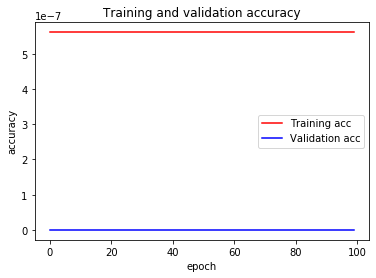

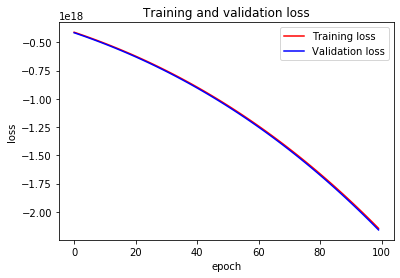

In [37]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

## A slightly more complex neural network

In [8]:
m2 = Sequential()
m2.add(Dense(25, input_dim=36, activation='relu'))
m2.add(Dense(18, activation='relu'))
m2.add(Dense(12, activation='relu'))
m2.add(Dense(10, activation='relu'))
m2.add(Dense(8, activation='relu'))
m2.add(Dense(1, activation='linear'))
m2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 25)                925       
_________________________________________________________________
dense_8 (Dense)              (None, 18)                468       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 1,848
Trainable params: 1,848
Non-trainable params: 0
____________________________________________________

In [10]:
adadelta= optimizers.Adadelta(learning_rate=1.0, rho=0.95)

In [14]:
m2.compile(optimizer=adadelta, loss='mean_squared_error', metrics=['mae', 'acc'])

In [16]:
history2= m2.fit(feature_array, target_array, validation_split=0.15, epochs=300, batch_size=500000)

Train on 3563482 samples, validate on 628850 samples
Epoch 1/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 1179.0977 - mae: 24.4088 - acc: 2.8062e-07 - val_loss: 1104.4634 - val_mae: 24.1849 - val_acc: 0.0000e+00
Epoch 2/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 981.5957 - mae: 22.1376 - acc: 2.8062e-07 - val_loss: 796.1646 - val_mae: 23.1766 - val_acc: 0.0000e+00
Epoch 3/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 757.8322 - mae: 20.6906 - acc: 5.6125e-07 - val_loss: 988.3172 - val_mae: 23.2432 - val_acc: 0.0000e+00
Epoch 4/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 428.0192 - mae: 15.1277 - acc: 5.6125e-07 - val_loss: 801.2570 - val_mae: 23.9018 - val_acc: 0.0000e+00
Epoch 5/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 263.4693 - mae: 11.1876 - acc: 1.1225e-06 - val_loss: 46.9650 - val_mae: 3.8548 - val_acc: 4.7706e-06
Epoch 6/300


3563482/3563482 [==============================] - 7s 2us/step - loss: 15.8897 - mae: 3.2133 - acc: 2.5256e-06 - val_loss: 14.0982 - val_mae: 3.1152 - val_acc: 1.5902e-06
Epoch 46/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 15.7802 - mae: 3.2074 - acc: 1.9644e-06 - val_loss: 13.6388 - val_mae: 3.0551 - val_acc: 1.5902e-06
Epoch 47/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 15.3369 - mae: 3.1599 - acc: 2.5256e-06 - val_loss: 13.6086 - val_mae: 3.0558 - val_acc: 1.5902e-06
Epoch 48/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 15.3556 - mae: 3.1658 - acc: 1.6837e-06 - val_loss: 13.8972 - val_mae: 3.0958 - val_acc: 1.5902e-06
Epoch 49/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 15.3089 - mae: 3.1660 - acc: 1.4031e-06 - val_loss: 13.0247 - val_mae: 3.0024 - val_acc: 1.5902e-06
Epoch 50/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 14.9054 -

3563482/3563482 [==============================] - 7s 2us/step - loss: 12.5756 - mae: 2.8575 - acc: 1.4031e-06 - val_loss: 10.9922 - val_mae: 2.7369 - val_acc: 0.0000e+00
Epoch 90/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 12.2385 - mae: 2.8256 - acc: 2.2450e-06 - val_loss: 11.2523 - val_mae: 2.7611 - val_acc: 0.0000e+00
Epoch 91/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 12.3784 - mae: 2.8364 - acc: 1.4031e-06 - val_loss: 11.0513 - val_mae: 2.7318 - val_acc: 0.0000e+00
Epoch 92/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 12.3419 - mae: 2.8332 - acc: 1.9644e-06 - val_loss: 11.1641 - val_mae: 2.7511 - val_acc: 0.0000e+00
Epoch 93/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 12.2936 - mae: 2.8252 - acc: 2.2450e-06 - val_loss: 11.1570 - val_mae: 2.7537 - val_acc: 0.0000e+00
Epoch 94/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 12.2952 -

3563482/3563482 [==============================] - 7s 2us/step - loss: 9.6345 - mae: 2.4296 - acc: 5.6125e-07 - val_loss: 9.2029 - val_mae: 2.4714 - val_acc: 0.0000e+00
Epoch 134/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.6742 - mae: 2.4279 - acc: 2.5256e-06 - val_loss: 8.9804 - val_mae: 2.4392 - val_acc: 0.0000e+00
Epoch 135/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.5678 - mae: 2.4188 - acc: 8.4187e-07 - val_loss: 8.8057 - val_mae: 2.3890 - val_acc: 0.0000e+00
Epoch 136/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.8135 - mae: 2.4490 - acc: 3.0869e-06 - val_loss: 8.2415 - val_mae: 2.3119 - val_acc: 0.0000e+00
Epoch 137/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.3828 - mae: 2.4048 - acc: 1.4031e-06 - val_loss: 8.2177 - val_mae: 2.1903 - val_acc: 0.0000e+00
Epoch 138/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.3545 - mae: 

Epoch 178/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.4031 - mae: 2.3327 - acc: 1.4031e-06 - val_loss: 8.5134 - val_mae: 2.2784 - val_acc: 0.0000e+00
Epoch 179/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.2987 - mae: 2.3217 - acc: 1.4031e-06 - val_loss: 7.9535 - val_mae: 2.1979 - val_acc: 0.0000e+00
Epoch 180/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 8.9066 - mae: 2.2769 - acc: 1.1225e-06 - val_loss: 8.6491 - val_mae: 2.2896 - val_acc: 0.0000e+00
Epoch 181/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.4387 - mae: 2.3356 - acc: 5.6125e-07 - val_loss: 8.4066 - val_mae: 2.2385 - val_acc: 0.0000e+00
Epoch 182/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 9.3014 - mae: 2.3192 - acc: 1.4031e-06 - val_loss: 8.3882 - val_mae: 2.2315 - val_acc: 0.0000e+00
Epoch 183/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 

Epoch 223/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 8.8892 - mae: 2.2280 - acc: 5.6125e-07 - val_loss: 7.5470 - val_mae: 2.1056 - val_acc: 0.0000e+00
Epoch 224/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 8.3940 - mae: 2.1796 - acc: 5.6125e-07 - val_loss: 7.9124 - val_mae: 2.1452 - val_acc: 0.0000e+00
Epoch 225/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 8.7475 - mae: 2.2174 - acc: 5.6125e-07 - val_loss: 7.9189 - val_mae: 2.1396 - val_acc: 0.0000e+00
Epoch 226/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 8.6997 - mae: 2.2092 - acc: 2.8062e-07 - val_loss: 7.9284 - val_mae: 2.1180 - val_acc: 0.0000e+00
Epoch 227/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 8.6902 - mae: 2.2041 - acc: 2.8062e-07 - val_loss: 7.5412 - val_mae: 2.1110 - val_acc: 0.0000e+00
Epoch 228/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 

Epoch 268/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 8.3103 - mae: 2.1088 - acc: 1.1225e-06 - val_loss: 7.4178 - val_mae: 2.0079 - val_acc: 0.0000e+00
Epoch 269/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 8.0888 - mae: 2.0833 - acc: 5.6125e-07 - val_loss: 7.4497 - val_mae: 2.0273 - val_acc: 0.0000e+00
Epoch 270/300
3563482/3563482 [==============================] - 8s 2us/step - loss: 8.2498 - mae: 2.0997 - acc: 1.1225e-06 - val_loss: 7.3959 - val_mae: 2.0191 - val_acc: 0.0000e+00
Epoch 271/300
3563482/3563482 [==============================] - 8s 2us/step - loss: 8.1598 - mae: 2.0862 - acc: 8.4187e-07 - val_loss: 7.1685 - val_mae: 1.9977 - val_acc: 0.0000e+00
Epoch 272/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 7.9748 - mae: 2.0678 - acc: 1.1225e-06 - val_loss: 7.2641 - val_mae: 2.0178 - val_acc: 0.0000e+00
Epoch 273/300
3563482/3563482 [==============================] - 7s 2us/step - loss: 

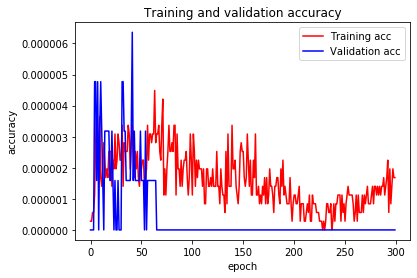

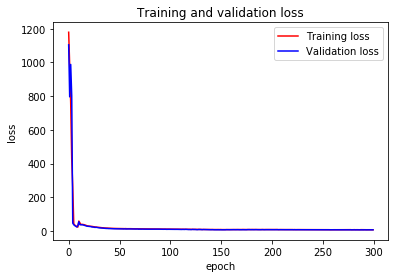

In [21]:
#Graphing our training and validation
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

convergence occured at 200 epochs. let's try a different metrics with higher epoch and see what we get

In [24]:
import keras

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                2368      
_________________________________________________________________
dense_74 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_75 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_76 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_77 (Dense)             (None, 18)                450       
_________________________________________________________________
dense_78 (Dense)             (None, 12)                228       
_________________________________________________________________
dense_79 (Dense)             (None, 10)              

Epoch 37/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 2.0863 - mae: 0.7816 - acc: 1.2067e-05 - val_loss: 0.9634 - val_mae: 0.6571 - val_acc: 3.1804e-06
Epoch 38/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.9998 - mae: 0.7697 - acc: 1.0383e-05 - val_loss: 1.6286 - val_mae: 0.6770 - val_acc: 3.1804e-06
Epoch 39/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.9793 - mae: 0.7596 - acc: 1.2909e-05 - val_loss: 1.5718 - val_mae: 0.6538 - val_acc: 3.1804e-06
Epoch 40/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 2.1546 - mae: 0.7894 - acc: 1.1225e-05 - val_loss: 1.1444 - val_mae: 0.6929 - val_acc: 3.1804e-06
Epoch 41/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 2.1335 - mae: 0.7827 - acc: 1.1506e-05 - val_loss: 1.2959 - val_mae: 0.6748 - val_acc: 1.5902e-06
Epoch 42/1000
3563482/3563482 [==============================] - 11s 3us/step - 

3563482/3563482 [==============================] - 11s 3us/step - loss: 1.1454 - mae: 0.6584 - acc: 1.1786e-05 - val_loss: 1.3025 - val_mae: 0.8075 - val_acc: 3.1804e-06
Epoch 82/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.1446 - mae: 0.6351 - acc: 1.1786e-05 - val_loss: 1.4480 - val_mae: 0.7385 - val_acc: 3.1804e-06
Epoch 83/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.0754 - mae: 0.6004 - acc: 1.3470e-05 - val_loss: 1.2421 - val_mae: 0.6898 - val_acc: 3.1804e-06
Epoch 84/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.0789 - mae: 0.5946 - acc: 1.1506e-05 - val_loss: 1.0538 - val_mae: 0.6141 - val_acc: 3.1804e-06
Epoch 85/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.2795 - mae: 0.6317 - acc: 1.2347e-05 - val_loss: 1.3816 - val_mae: 0.7213 - val_acc: 3.1804e-06
Epoch 86/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.2300 -

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3070 - mae: 0.3754 - acc: 1.9924e-05 - val_loss: 0.4343 - val_mae: 0.4417 - val_acc: 6.3608e-06
Epoch 126/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6132 - mae: 0.4120 - acc: 2.1608e-05 - val_loss: 0.2786 - val_mae: 0.3434 - val_acc: 3.1804e-06
Epoch 127/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 38.3319 - mae: 1.1930 - acc: 1.4031e-05 - val_loss: 3.9323 - val_mae: 1.3516 - val_acc: 1.5902e-06
Epoch 128/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 3.3776 - mae: 1.2160 - acc: 8.6994e-06 - val_loss: 1.9218 - val_mae: 0.7542 - val_acc: 4.7706e-06
Epoch 129/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.4187 - mae: 0.7829 - acc: 1.1225e-05 - val_loss: 1.7252 - val_mae: 0.7827 - val_acc: 1.5902e-06
Epoch 130/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.8180 - mae: 0.5092 - acc: 1.3189e-05 - val_loss: 0.5731 - val_mae: 0.4297 - val_acc: 4.7706e-06
Epoch 170/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.8029 - mae: 0.5062 - acc: 1.3751e-05 - val_loss: 0.7525 - val_mae: 0.5584 - val_acc: 3.1804e-06
Epoch 171/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.7841 - mae: 0.4979 - acc: 1.4873e-05 - val_loss: 0.8273 - val_mae: 0.4973 - val_acc: 4.7706e-06
Epoch 172/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.8329 - mae: 0.5150 - acc: 1.4031e-05 - val_loss: 0.7118 - val_mae: 0.4680 - val_acc: 4.7706e-06
Epoch 173/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.9181 - mae: 0.5374 - acc: 1.4031e-05 - val_loss: 0.4758 - val_mae: 0.4228 - val_acc: 4.7706e-06
Epoch 174/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.8

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5014 - mae: 0.4234 - acc: 1.5154e-05 - val_loss: 0.8713 - val_mae: 0.4959 - val_acc: 3.1804e-06
Epoch 214/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4929 - mae: 0.4061 - acc: 1.9082e-05 - val_loss: 0.3543 - val_mae: 0.3910 - val_acc: 3.1804e-06
Epoch 215/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6292 - mae: 0.4620 - acc: 1.4031e-05 - val_loss: 0.6196 - val_mae: 0.4918 - val_acc: 4.7706e-06
Epoch 216/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6400 - mae: 0.4638 - acc: 1.3751e-05 - val_loss: 0.6082 - val_mae: 0.4269 - val_acc: 3.1804e-06
Epoch 217/1000
3563482/3563482 [==============================] - 13s 4us/step - loss: 0.5517 - mae: 0.3796 - acc: 2.4414e-05 - val_loss: 0.3689 - val_mae: 0.3982 - val_acc: 4.7706e-06
Epoch 218/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4938 - mae: 0.4038 - acc: 1.4312e-05 - val_loss: 0.2792 - val_mae: 0.3322 - val_acc: 6.3608e-06
Epoch 258/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5428 - mae: 0.4189 - acc: 1.4312e-05 - val_loss: 0.4747 - val_mae: 0.4409 - val_acc: 4.7706e-06
Epoch 259/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3584 - mae: 0.3560 - acc: 1.5434e-05 - val_loss: 0.3231 - val_mae: 0.3302 - val_acc: 3.1804e-06
Epoch 260/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3108 - mae: 0.3293 - acc: 2.0486e-05 - val_loss: 0.4500 - val_mae: 0.4276 - val_acc: 4.7706e-06
Epoch 261/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4746 - mae: 0.3984 - acc: 1.4031e-05 - val_loss: 0.6327 - val_mae: 0.4328 - val_acc: 4.7706e-06
Epoch 262/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5

3563482/3563482 [==============================] - 11s 3us/step - loss: 2.3234 - mae: 0.8555 - acc: 8.9800e-06 - val_loss: 1.3106 - val_mae: 0.7201 - val_acc: 1.5902e-06
Epoch 302/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.6216 - mae: 0.7009 - acc: 1.0102e-05 - val_loss: 1.7419 - val_mae: 0.6859 - val_acc: 3.1804e-06
Epoch 303/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.3428 - mae: 0.6292 - acc: 1.1225e-05 - val_loss: 1.5663 - val_mae: 0.7416 - val_acc: 1.5902e-06
Epoch 304/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.1462 - mae: 0.5806 - acc: 1.1225e-05 - val_loss: 0.5970 - val_mae: 0.4251 - val_acc: 4.7706e-06
Epoch 305/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.9742 - mae: 0.5311 - acc: 1.2909e-05 - val_loss: 0.2862 - val_mae: 0.3144 - val_acc: 3.1804e-06
Epoch 306/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.7

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4847 - mae: 0.3933 - acc: 1.4873e-05 - val_loss: 0.4630 - val_mae: 0.4247 - val_acc: 4.7706e-06
Epoch 346/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5404 - mae: 0.4063 - acc: 1.4312e-05 - val_loss: 0.5177 - val_mae: 0.3735 - val_acc: 4.7706e-06
Epoch 347/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5030 - mae: 0.3987 - acc: 1.4873e-05 - val_loss: 0.5792 - val_mae: 0.3913 - val_acc: 4.7706e-06
Epoch 348/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5897 - mae: 0.4239 - acc: 1.4312e-05 - val_loss: 0.6404 - val_mae: 0.4542 - val_acc: 4.7706e-06
Epoch 349/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4568 - mae: 0.3816 - acc: 1.5154e-05 - val_loss: 0.5594 - val_mae: 0.4318 - val_acc: 4.7706e-06
Epoch 350/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4

3563482/3563482 [==============================] - 11s 3us/step - loss: 233.8701 - mae: 2.8635 - acc: 1.2347e-05 - val_loss: 18.8871 - val_mae: 3.2965 - val_acc: 0.0000e+00
Epoch 390/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 11.4248 - mae: 2.4909 - acc: 1.9644e-06 - val_loss: 7.6614 - val_mae: 1.9905 - val_acc: 0.0000e+00
Epoch 391/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 5.8395 - mae: 1.6879 - acc: 3.3675e-06 - val_loss: 5.0747 - val_mae: 1.4306 - val_acc: 1.5902e-06
Epoch 392/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 4.1486 - mae: 1.2899 - acc: 6.4544e-06 - val_loss: 3.2777 - val_mae: 1.1184 - val_acc: 3.1804e-06
Epoch 393/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 3.6056 - mae: 1.1183 - acc: 7.2962e-06 - val_loss: 3.7501 - val_mae: 1.1591 - val_acc: 1.5902e-06
Epoch 394/1000
3563482/3563482 [==============================] - 11s 3us/step - loss:

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.9604 - mae: 0.5220 - acc: 1.2909e-05 - val_loss: 1.1090 - val_mae: 0.6030 - val_acc: 3.1804e-06
Epoch 434/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.9459 - mae: 0.5147 - acc: 1.2909e-05 - val_loss: 0.1645 - val_mae: 0.2462 - val_acc: 6.3608e-06
Epoch 435/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.7035 - mae: 0.4542 - acc: 1.2909e-05 - val_loss: 0.5478 - val_mae: 0.4007 - val_acc: 3.1804e-06
Epoch 436/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6130 - mae: 0.3898 - acc: 2.0486e-05 - val_loss: 0.6205 - val_mae: 0.4366 - val_acc: 4.7706e-06
Epoch 437/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.7776 - mae: 0.4684 - acc: 1.3470e-05 - val_loss: 0.3664 - val_mae: 0.4291 - val_acc: 3.1804e-06
Epoch 438/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4587 - mae: 0.3805 - acc: 1.4873e-05 - val_loss: 0.3710 - val_mae: 0.4103 - val_acc: 4.7706e-06
Epoch 478/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4730 - mae: 0.3750 - acc: 1.4592e-05 - val_loss: 0.3671 - val_mae: 0.3684 - val_acc: 4.7706e-06
Epoch 479/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5387 - mae: 0.4056 - acc: 1.4592e-05 - val_loss: 0.5447 - val_mae: 0.4226 - val_acc: 4.7706e-06
Epoch 480/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5997 - mae: 0.4246 - acc: 1.2909e-05 - val_loss: 0.6013 - val_mae: 0.4112 - val_acc: 4.7706e-06
Epoch 481/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5970 - mae: 0.4241 - acc: 1.4312e-05 - val_loss: 0.2971 - val_mae: 0.2893 - val_acc: 4.7706e-06
Epoch 482/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5041 - mae: 0.3442 - acc: 2.3853e-05 - val_loss: 0.3763 - val_mae: 0.3477 - val_acc: 4.7706e-06
Epoch 522/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4355 - mae: 0.3683 - acc: 1.3751e-05 - val_loss: 0.9330 - val_mae: 0.5547 - val_acc: 3.1804e-06
Epoch 523/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 2.3068 - mae: 0.4638 - acc: 2.0486e-05 - val_loss: 0.2869 - val_mae: 0.3697 - val_acc: 4.7706e-06
Epoch 524/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.2094 - mae: 0.3117 - acc: 2.0486e-05 - val_loss: 0.3688 - val_mae: 0.3953 - val_acc: 4.7706e-06
Epoch 525/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.1679 - mae: 0.2672 - acc: 2.5537e-05 - val_loss: 0.0593 - val_mae: 0.2064 - val_acc: 7.1559e-05
Epoch 526/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.2

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6050 - mae: 0.4220 - acc: 1.3189e-05 - val_loss: 0.4598 - val_mae: 0.3555 - val_acc: 4.7706e-06
Epoch 566/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5419 - mae: 0.3962 - acc: 1.3751e-05 - val_loss: 0.2347 - val_mae: 0.2742 - val_acc: 4.7706e-06
Epoch 567/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4716 - mae: 0.3786 - acc: 1.5434e-05 - val_loss: 0.4812 - val_mae: 0.3631 - val_acc: 4.7706e-06
Epoch 568/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4840 - mae: 0.3778 - acc: 1.5154e-05 - val_loss: 0.5470 - val_mae: 0.3867 - val_acc: 3.1804e-06
Epoch 569/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4624 - mae: 0.3755 - acc: 1.4873e-05 - val_loss: 0.5873 - val_mae: 0.4101 - val_acc: 4.7706e-06
Epoch 570/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4

3563482/3563482 [==============================] - 11s 3us/step - loss: 3.9052 - mae: 1.0563 - acc: 7.0156e-06 - val_loss: 2.8069 - val_mae: 0.9195 - val_acc: 3.1804e-06
Epoch 610/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 3.5848 - mae: 0.9938 - acc: 8.4187e-06 - val_loss: 2.4931 - val_mae: 1.0872 - val_acc: 3.1804e-06
Epoch 611/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 3.1923 - mae: 0.9519 - acc: 8.6994e-06 - val_loss: 7.6455 - val_mae: 1.2684 - val_acc: 3.1804e-06
Epoch 612/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 2.7708 - mae: 0.8911 - acc: 8.9800e-06 - val_loss: 1.4283 - val_mae: 0.6080 - val_acc: 6.3608e-06
Epoch 613/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 2.5864 - mae: 0.8617 - acc: 9.8219e-06 - val_loss: 1.4183 - val_mae: 0.6504 - val_acc: 3.1804e-06
Epoch 614/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 2.2

3563482/3563482 [==============================] - 11s 3us/step - loss: 1.0978 - mae: 0.6003 - acc: 1.0664e-05 - val_loss: 1.2279 - val_mae: 0.6745 - val_acc: 3.1804e-06
Epoch 654/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 1.0199 - mae: 0.5594 - acc: 1.1786e-05 - val_loss: 1.2401 - val_mae: 0.5250 - val_acc: 4.7706e-06
Epoch 655/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6951 - mae: 0.4838 - acc: 1.5715e-05 - val_loss: 0.1711 - val_mae: 0.3679 - val_acc: 6.3608e-06
Epoch 656/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 2.3357 - mae: 0.4855 - acc: 2.0766e-05 - val_loss: 0.6624 - val_mae: 0.6273 - val_acc: 4.7706e-06
Epoch 657/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3422 - mae: 0.4207 - acc: 1.8241e-05 - val_loss: 0.5394 - val_mae: 0.4952 - val_acc: 3.1804e-06
Epoch 658/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.8

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5732 - mae: 0.4040 - acc: 1.7399e-05 - val_loss: 0.2678 - val_mae: 0.3584 - val_acc: 4.7706e-06
Epoch 698/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6841 - mae: 0.3696 - acc: 2.2731e-05 - val_loss: 0.5852 - val_mae: 0.3879 - val_acc: 4.7706e-06
Epoch 699/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 23.3553 - mae: 1.0083 - acc: 1.7960e-05 - val_loss: 1.4687 - val_mae: 0.7103 - val_acc: 1.5902e-06
Epoch 700/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.7509 - mae: 0.5339 - acc: 1.1506e-05 - val_loss: 0.9132 - val_mae: 0.5116 - val_acc: 4.7706e-06
Epoch 701/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6428 - mae: 0.4850 - acc: 1.1506e-05 - val_loss: 1.2655 - val_mae: 0.6275 - val_acc: 3.1804e-06
Epoch 702/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5978 - mae: 0.4412 - acc: 1.2067e-05 - val_loss: 0.8603 - val_mae: 0.5081 - val_acc: 3.1804e-06
Epoch 742/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.8035 - mae: 0.4999 - acc: 1.1506e-05 - val_loss: 0.7832 - val_mae: 0.4271 - val_acc: 4.7706e-06
Epoch 743/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6772 - mae: 0.4626 - acc: 1.1506e-05 - val_loss: 1.1102 - val_mae: 0.5622 - val_acc: 3.1804e-06
Epoch 744/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6049 - mae: 0.4121 - acc: 1.9363e-05 - val_loss: 0.3852 - val_mae: 0.4064 - val_acc: 4.7706e-06
Epoch 745/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4353 - mae: 0.3868 - acc: 1.3751e-05 - val_loss: 0.5315 - val_mae: 0.5021 - val_acc: 4.7706e-06
Epoch 746/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5478 - mae: 0.4121 - acc: 1.4031e-05 - val_loss: 0.2776 - val_mae: 0.3566 - val_acc: 3.1804e-06
Epoch 786/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5664 - mae: 0.4107 - acc: 1.2628e-05 - val_loss: 0.3394 - val_mae: 0.2942 - val_acc: 4.7706e-06
Epoch 787/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6901 - mae: 0.4487 - acc: 1.3189e-05 - val_loss: 0.4017 - val_mae: 0.3422 - val_acc: 4.7706e-06
Epoch 788/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6119 - mae: 0.4276 - acc: 1.2067e-05 - val_loss: 0.6124 - val_mae: 0.4897 - val_acc: 3.1804e-06
Epoch 789/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5290 - mae: 0.3913 - acc: 1.5715e-05 - val_loss: 0.4938 - val_mae: 0.3746 - val_acc: 4.7706e-06
Epoch 790/1000
3563482/3563482 [==============================] - 12s 3us/step - loss: 0.5

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4885 - mae: 0.4002 - acc: 1.2909e-05 - val_loss: 0.3284 - val_mae: 0.3229 - val_acc: 4.7706e-06
Epoch 830/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5904 - mae: 0.4249 - acc: 1.3751e-05 - val_loss: 0.4967 - val_mae: 0.4271 - val_acc: 4.7706e-06
Epoch 831/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5174 - mae: 0.3859 - acc: 1.9644e-05 - val_loss: 0.5772 - val_mae: 0.4242 - val_acc: 4.7706e-06
Epoch 832/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6000 - mae: 0.4345 - acc: 1.3751e-05 - val_loss: 0.4181 - val_mae: 0.4099 - val_acc: 3.1804e-06
Epoch 833/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5655 - mae: 0.4188 - acc: 1.4592e-05 - val_loss: 0.5430 - val_mae: 0.3713 - val_acc: 4.7706e-06
Epoch 834/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3134 - mae: 0.3422 - acc: 1.5434e-05 - val_loss: 0.5033 - val_mae: 0.4375 - val_acc: 4.7706e-06
Epoch 874/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5366 - mae: 0.4196 - acc: 1.3751e-05 - val_loss: 0.7200 - val_mae: 0.4402 - val_acc: 4.7706e-06
Epoch 875/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4822 - mae: 0.3987 - acc: 1.2909e-05 - val_loss: 0.7937 - val_mae: 0.4550 - val_acc: 3.1804e-06
Epoch 876/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4284 - mae: 0.3818 - acc: 1.4312e-05 - val_loss: 0.6363 - val_mae: 0.4553 - val_acc: 4.7706e-06
Epoch 877/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.5713 - mae: 0.4270 - acc: 1.2909e-05 - val_loss: 0.4233 - val_mae: 0.3286 - val_acc: 4.7706e-06
Epoch 878/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.6

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.1692 - mae: 0.2740 - acc: 2.4134e-05 - val_loss: 0.2167 - val_mae: 0.2416 - val_acc: 4.7706e-06
Epoch 918/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3517 - mae: 0.3442 - acc: 1.4031e-05 - val_loss: 0.2965 - val_mae: 0.3440 - val_acc: 4.7706e-06
Epoch 919/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4109 - mae: 0.3626 - acc: 1.4592e-05 - val_loss: 0.4679 - val_mae: 0.3429 - val_acc: 4.7706e-06
Epoch 920/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4501 - mae: 0.3733 - acc: 1.4592e-05 - val_loss: 0.3765 - val_mae: 0.3260 - val_acc: 4.7706e-06
Epoch 921/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3860 - mae: 0.3423 - acc: 1.9924e-05 - val_loss: 0.4255 - val_mae: 0.3512 - val_acc: 4.7706e-06
Epoch 922/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3

3563482/3563482 [==============================] - 11s 3us/step - loss: 0.4673 - mae: 0.3869 - acc: 1.4312e-05 - val_loss: 0.8511 - val_mae: 0.4626 - val_acc: 4.7706e-06
Epoch 962/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.3741 - mae: 0.3528 - acc: 1.5715e-05 - val_loss: 0.2514 - val_mae: 0.3956 - val_acc: 4.7706e-06
Epoch 963/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 11.3682 - mae: 0.5096 - acc: 1.8802e-05 - val_loss: 0.2983 - val_mae: 0.3187 - val_acc: 3.1804e-06
Epoch 964/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.2482 - mae: 0.3213 - acc: 2.0205e-05 - val_loss: 0.1247 - val_mae: 0.3187 - val_acc: 3.4984e-05
Epoch 965/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.1681 - mae: 0.2810 - acc: 2.9466e-05 - val_loss: 0.0661 - val_mae: 0.2308 - val_acc: 6.9969e-05
Epoch 966/1000
3563482/3563482 [==============================] - 11s 3us/step - loss: 0.

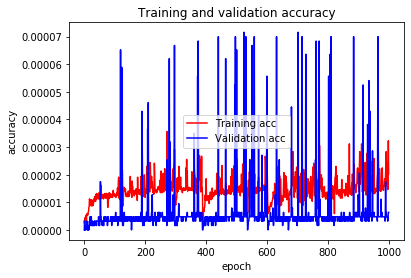

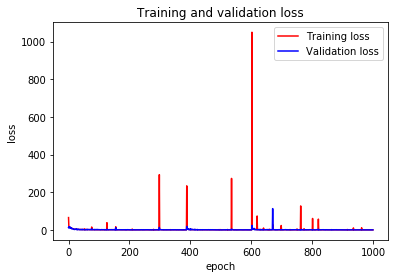

In [32]:
leaky=keras.layers.LeakyReLU(alpha=0.3)
m3 = Sequential()
m3.add(Dense(64, input_dim=36, activation=leaky))
m3.add(Dense(48, activation=leaky))
m3.add(Dense(32, activation=leaky))
m3.add(Dense(24, activation=leaky))
m3.add(Dense(18, activation=leaky))
m3.add(Dense(12, activation=leaky))
m3.add(Dense(10, activation=leaky))
m3.add(Dense(8, activation=leaky))
m3.add(Dense(1, activation='linear'))
m3.summary()
m3.compile(optimizer=adadelta, loss='mean_squared_error', metrics=['mae', 'acc'])
history3= m3.fit(feature_array, target_array, validation_split=0.15, epochs=1000, batch_size=5000)
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

Modified Relu with more dense layers

In [37]:
earlystop=keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
terminate= keras.callbacks.callbacks.TerminateOnNaN()

In [34]:
m4 = Sequential()
m4.add(Dense(64, input_dim=36, activation='relu'))
m4.add(Dense(32, activation='relu'))
m4.add(Dense(16, activation='relu'))
m4.add(Dense(8, activation='relu'))
m4.add(Dense(4, activation='relu'))
m4.add(Dense(1, activation='linear'))
m4.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 64)                2368      
_________________________________________________________________
dense_89 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_90 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_91 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_92 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 5         
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
___________________________________________________

In [41]:
m4.compile(optimizer=adadelta, loss='mean_squared_error', metrics=['mae', 'acc'])
his4=m4.fit(feature_array, target_array, validation_split=0.3, verbose=1, 
            epochs=300, batch_size=5000)

Train on 2934632 samples, validate on 1257700 samples
Epoch 1/300
2934632/2934632 [==============================] - 8s 3us/step - loss: 3.3486 - mae: 1.1079 - acc: 1.0904e-05 - val_loss: 4.4576 - val_mae: 1.0706 - val_acc: 1.1131e-05
Epoch 2/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 4.7274 - mae: 1.2893 - acc: 6.8152e-06 - val_loss: 5.2313 - val_mae: 1.2710 - val_acc: 6.3608e-06
Epoch 3/300
2934632/2934632 [==============================] - 7s 3us/step - loss: 4.9556 - mae: 1.2834 - acc: 7.8374e-06 - val_loss: 7.3892 - val_mae: 1.5394 - val_acc: 7.9510e-06
Epoch 4/300
2934632/2934632 [==============================] - 8s 3us/step - loss: 5.0792 - mae: 1.2714 - acc: 6.1336e-06 - val_loss: 2.4094 - val_mae: 0.8559 - val_acc: 7.9510e-06
Epoch 5/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 5.0316 - mae: 1.2255 - acc: 8.8597e-06 - val_loss: 4.8982 - val_mae: 1.0270 - val_acc: 1.1927e-05
Epoch 6/300
2934632/2934632 [============

Epoch 46/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 2.1141 - mae: 0.7535 - acc: 1.1245e-05 - val_loss: 1.2149 - val_mae: 0.6565 - val_acc: 9.5412e-06
Epoch 47/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 2.2371 - mae: 0.7781 - acc: 1.3290e-05 - val_loss: 2.5136 - val_mae: 0.9064 - val_acc: 5.5657e-06
Epoch 48/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 2.4987 - mae: 0.7984 - acc: 1.2267e-05 - val_loss: 1.7642 - val_mae: 0.6439 - val_acc: 1.3517e-05
Epoch 49/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.9001 - mae: 0.7229 - acc: 1.1586e-05 - val_loss: 2.1981 - val_mae: 0.8010 - val_acc: 1.0336e-05
Epoch 50/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 2.0568 - mae: 0.7183 - acc: 1.3290e-05 - val_loss: 1.5975 - val_mae: 0.7455 - val_acc: 1.1131e-05
Epoch 51/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 2.2081

2934632/2934632 [==============================] - 7s 2us/step - loss: 1.4314 - mae: 0.6089 - acc: 1.4653e-05 - val_loss: 0.8537 - val_mae: 0.6111 - val_acc: 7.9510e-06
Epoch 92/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.4456 - mae: 0.6023 - acc: 1.2949e-05 - val_loss: 1.5620 - val_mae: 0.6037 - val_acc: 1.4312e-05
Epoch 93/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.5207 - mae: 0.6184 - acc: 1.1927e-05 - val_loss: 1.0710 - val_mae: 0.5140 - val_acc: 1.5107e-05
Epoch 94/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.4003 - mae: 0.5940 - acc: 1.3290e-05 - val_loss: 1.4220 - val_mae: 0.5528 - val_acc: 1.4312e-05
Epoch 95/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.4657 - mae: 0.6123 - acc: 1.3290e-05 - val_loss: 1.2970 - val_mae: 0.5432 - val_acc: 1.2722e-05
Epoch 96/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.6019 - mae: 0.630

Epoch 136/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.1463 - mae: 0.5507 - acc: 1.3290e-05 - val_loss: 1.1838 - val_mae: 0.5526 - val_acc: 1.4312e-05
Epoch 137/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.1294 - mae: 0.5451 - acc: 1.2608e-05 - val_loss: 1.0522 - val_mae: 0.4653 - val_acc: 1.5107e-05
Epoch 138/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.2010 - mae: 0.5617 - acc: 1.3971e-05 - val_loss: 1.0694 - val_mae: 0.5124 - val_acc: 1.2722e-05
Epoch 139/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.1943 - mae: 0.5565 - acc: 1.3290e-05 - val_loss: 0.6323 - val_mae: 0.4256 - val_acc: 1.2722e-05
Epoch 140/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.8381 - mae: 0.4868 - acc: 1.3630e-05 - val_loss: 0.6806 - val_mae: 0.4313 - val_acc: 1.4312e-05
Epoch 141/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 

Epoch 181/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.0239 - mae: 0.5370 - acc: 1.3290e-05 - val_loss: 1.4724 - val_mae: 0.5988 - val_acc: 1.2722e-05
Epoch 182/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.1072 - mae: 0.5394 - acc: 1.2949e-05 - val_loss: 0.9138 - val_mae: 0.5077 - val_acc: 1.4312e-05
Epoch 183/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.9394 - mae: 0.5120 - acc: 1.2949e-05 - val_loss: 0.7631 - val_mae: 0.4154 - val_acc: 1.2722e-05
Epoch 184/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.0161 - mae: 0.5339 - acc: 1.3630e-05 - val_loss: 1.0085 - val_mae: 0.4873 - val_acc: 1.3517e-05
Epoch 185/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.9955 - mae: 0.5252 - acc: 1.1927e-05 - val_loss: 0.9684 - val_mae: 0.4463 - val_acc: 1.3517e-05
Epoch 186/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 

2934632/2934632 [==============================] - 7s 2us/step - loss: 1.0029 - mae: 0.5226 - acc: 1.2949e-05 - val_loss: 0.6348 - val_mae: 0.5021 - val_acc: 1.3517e-05
Epoch 226/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.9662 - mae: 0.5204 - acc: 1.2949e-05 - val_loss: 1.7483 - val_mae: 0.6888 - val_acc: 1.2722e-05
Epoch 227/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.8735 - mae: 0.5054 - acc: 1.3630e-05 - val_loss: 1.0307 - val_mae: 0.5236 - val_acc: 1.2722e-05
Epoch 228/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 1.0386 - mae: 0.5327 - acc: 1.2949e-05 - val_loss: 1.7643 - val_mae: 0.6361 - val_acc: 1.4312e-05
Epoch 229/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.9455 - mae: 0.5247 - acc: 1.1245e-05 - val_loss: 0.7010 - val_mae: 0.4022 - val_acc: 1.3517e-05
Epoch 230/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.8388 - mae: 

Epoch 270/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.7188 - mae: 0.4732 - acc: 1.3971e-05 - val_loss: 0.4093 - val_mae: 0.3864 - val_acc: 1.5902e-05
Epoch 271/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.6898 - mae: 0.4660 - acc: 1.1927e-05 - val_loss: 1.3482 - val_mae: 0.5240 - val_acc: 1.2722e-05
Epoch 272/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.9823 - mae: 0.4949 - acc: 1.3630e-05 - val_loss: 0.7092 - val_mae: 0.4267 - val_acc: 1.4312e-05
Epoch 273/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.7236 - mae: 0.4424 - acc: 1.3971e-05 - val_loss: 0.5397 - val_mae: 0.4332 - val_acc: 1.5107e-05
Epoch 274/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 0.7479 - mae: 0.4726 - acc: 1.2949e-05 - val_loss: 0.6153 - val_mae: 0.3827 - val_acc: 1.3517e-05
Epoch 275/300
2934632/2934632 [==============================] - 7s 2us/step - loss: 

In [42]:
m4_eval= m4.evaluate(feature_array, target_array, batch_size=5000)

4192332/4192332 [==============================] - 3s 1us/step


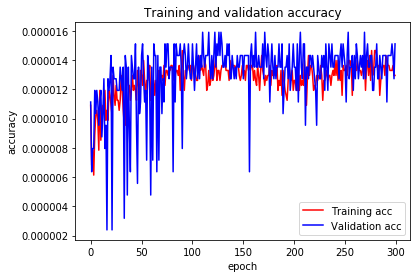

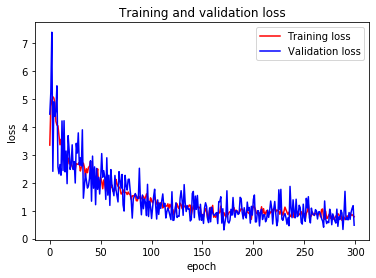

In [44]:
acc = his4.history['acc']
val_acc = his4.history['val_acc']
loss = his4.history['loss']
val_loss = his4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

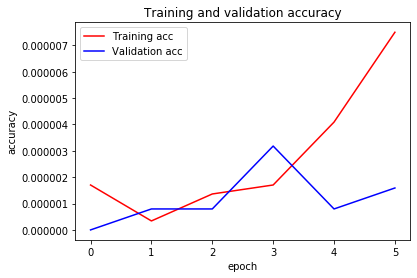

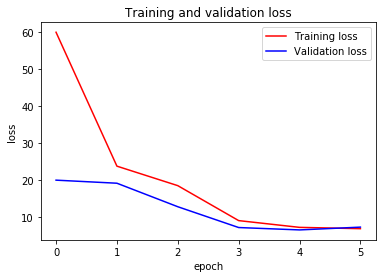

In [40]:
#with early and termination callback established
acc = his4.history['acc']
val_acc = his4.history['val_acc']
loss = his4.history['loss']
val_loss = his4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

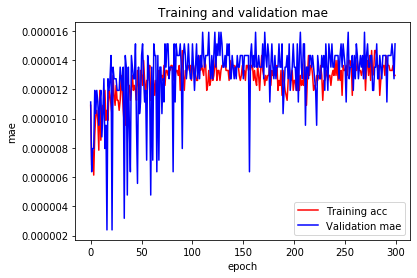

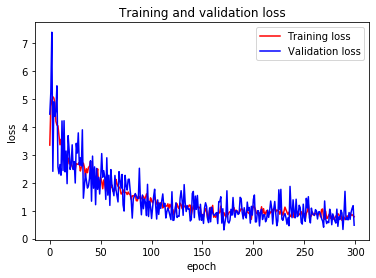

In [45]:
mae = his4.history['mae']
val_mae = his4.history['val_mae']
loss = his4.history['loss']
val_loss = his4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.ylabel('mae')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()